In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import swifter

In [2]:
# code for exporting the information as pickle format.
# info.to_pickle('data_format1/user_info_format1.pkl')
# log = log.to_pickle('data_format1/user_log_format1.pkl')

In [5]:
# code for importing the original data.
# info = pd.read_csv('data_format1/user_info_format1.csv')
log = pd.read_csv('./data_format1/user_log_format1.csv')
# info = pd.read_pickle('data_format1/user_info_format1.pkl')
# log = pd.read_pickle('data_format1/user_log_format1.pkl')
# df_train = pd.read_csv('data_format1/train_format1.csv')

In [4]:
# info_ori = info.copy()
# log_ori = log.copy()
# df_train_ori = df_train.copy()

In [5]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [6]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


In [7]:
info.head()

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [8]:
log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [9]:
info['age_range'] = info['age_range'].fillna(0)
info['gender'] = info['gender'].fillna(2)

In [10]:
info['age_range'] = info['age_range'].astype('category')
info['gender'] = info['gender'].astype('category')

In [11]:
info['age_range'] = info['age_range'].replace(8, 7)

In [12]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   user_id    424170 non-null  int64   
 1   age_range  424170 non-null  category
 2   gender     424170 non-null  category
dtypes: category(2), int64(1)
memory usage: 4.0 MB


In [13]:
def ChangeDateFormat(date):
    month = date // 100
    day = date % 100
    date = '2020-' + str(month) + '-' + str(day)
    return pd.Timestamp(date)

In [14]:
log['time_stamp'] = log['time_stamp'].swifter.apply(lambda x: ChangeDateFormat(x))

Dask Apply:   0%|          | 0/32 [00:00<?, ?it/s]

<AxesSubplot:>

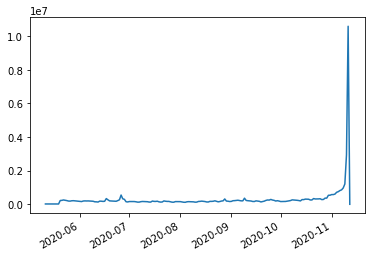

In [15]:
log['time_stamp'].value_counts().plot(kind='line')

[Text(0, 0, 'unknown'),
 Text(0, 1, '<18'),
 Text(0, 2, '18-24'),
 Text(0, 3, '25-29'),
 Text(0, 4, '30-34'),
 Text(0, 5, '35-39'),
 Text(0, 6, '40-49'),
 Text(0, 7, '>=50')]

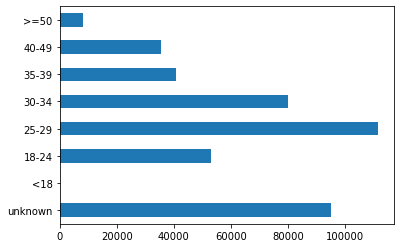

In [16]:
fig = info['age_range'].value_counts(sort=False).plot(kind='barh')
fig.set_yticklabels(["unknown","<18","18-24","25-29","30-34","35-39","40-49",">=50"])

[Text(0, 0, 'female'), Text(0, 1, 'male'), Text(0, 2, 'unknown')]

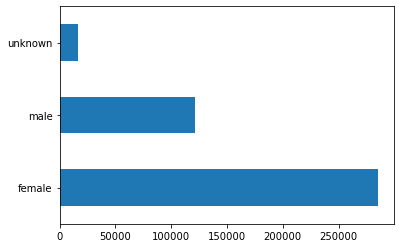

In [17]:
fig = info['gender'].value_counts(sort=False).plot(kind='barh')
fig.set_yticklabels(["female","male", "unknown"])

[Text(0, 0, 'click'),
 Text(0, 1, 'add-to-cart'),
 Text(0, 2, 'purchase'),
 Text(0, 3, 'add-to-favorite')]

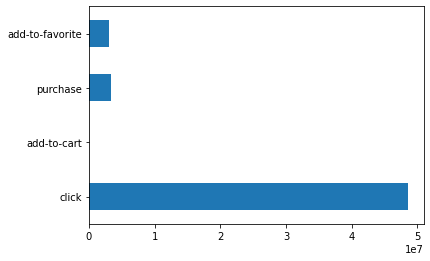

In [18]:
fig = log['action_type'].value_counts(sort=False).plot(kind='barh')
fig.set_yticklabels(['click', 'add-to-cart', 'purchase', 'add-to-favorite'])

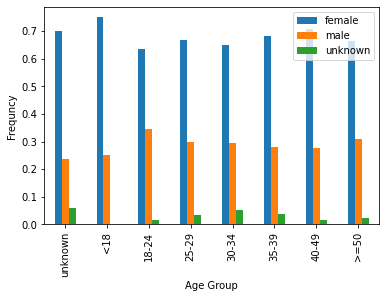

In [19]:
ct = pd.crosstab(info['age_range'], info['gender'], margins=True)
fig = ct.iloc[:,0:-1].div(ct.iloc[:,-1], axis=0).round(3).iloc[0:-1,:].plot(kind='bar')
fig.set_xticklabels(["unknown","<18","18-24","25-29","30-34","35-39","40-49",">=50"])
fig.set_xlabel('Age Group')
fig.set_ylabel('Frequncy')
plt.legend(['female', 'male', 'unknown'])

### Seller info

In [20]:
seller_item_count = log[['seller_id','item_id']]
seller_item_count = seller_item_count.drop_duplicates()
seller_item_count['seller_item_count'] = 1
seller_item_count = seller_item_count.groupby(['seller_id']).agg('sum')
seller_item_count = seller_item_count.drop(columns=['item_id'])
seller_item_count.head()

,seller_item_count
seller_id,
1,2977
2,154
3,171
4,155
5,660


In [21]:
seller_brand_count = log[['seller_id','brand_id']]
seller_brand_count = seller_brand_count.drop_duplicates()
seller_brand_count = seller_brand_count.groupby(['seller_id']).agg(len)
seller_brand_count.rename(columns = {"brand_id": "brand_count"},inplace=True) 
seller_brand_count.head()

,brand_count
seller_id,
1,3.0
2,2.0
3,2.0
4,3.0
5,2.0


In [23]:
item_info = log.value_counts('item_id')
cat_info = log.value_counts('cat_id')
brand_info = log.value_counts('brand_id')
seller_info = log.value_counts('seller_id')
print(item_info.head(), item_info.size)
print(cat_info.head(),cat_info.size)
print(brand_info.head(),brand_info.size)
print(seller_info.head(),seller_info.size)

item_id
67897     345905
783997    178005
636863     82480
631714     42771
61518      34801
dtype: int64 1090390
cat_id
662     4339025
737     1749753
1505    1724239
389     1621736
656     1538969
dtype: int64 1658
brand_id
3738.0    763345
1360.0    737545
1446.0    729555
1214.0    541075
5376.0    528003
dtype: int64 8443
seller_id
3760    743217
3828    730455
184     613811
1102    541374
4173    528755
dtype: int64 4995


In [24]:
log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,2020-08-29,0
1,328862,844400,1271,2882,2661.0,2020-08-29,0
2,328862,575153,1271,2882,2661.0,2020-08-29,0
3,328862,996875,1271,2882,2661.0,2020-08-29,0
4,328862,1086186,1271,1253,1049.0,2020-08-29,0


In [25]:
log_sample = log.sample(frac=0.005,random_state=1)

In [26]:
# log_sample.pivot_table(index=['user_id','seller_id'],aggfunc=len)

In [27]:
user_seller = log_sample.groupby(['user_id','seller_id'])['item_id'].count()

In [28]:
user_seller.head()

user_id  seller_id
3        806          1
         2472         1
4        2102         1
11       4472         1
14       1480         1
Name: item_id, dtype: int64

In [29]:
user_seller[user_seller > 1]

user_id  seller_id
14       3828         2
22       184          3
44       3064         2
46       1595         2
50       4976         2
                     ..
424001   4173         2
424034   1679         2
424056   1928         2
424099   1941         2
424131   2823         2
Name: item_id, Length: 13289, dtype: int64

In [30]:
user_seller = user_seller > 1

In [31]:
user_seller.head()

user_id  seller_id
3        806          False
         2472         False
4        2102         False
11       4472         False
14       1480         False
Name: item_id, dtype: bool

In [32]:
df_train.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


### user action

In [33]:
actions = log.action_type
actions = pd.get_dummies(actions,prefix='action')
user_action = pd.concat([log.user_id,actions],axis=1)
# user_action = log[['user_id','action_type']]
# user_action.action_type = user_action.action_type.astype('category')

user_action = user_action.groupby('user_id').agg('sum')
user_action.head()

,action_0,action_1,action_2,action_3
user_id,,,,
1,27.0,0.0,6.0,0.0
2,47.0,0.0,14.0,2.0
3,63.0,0.0,4.0,1.0
4,49.0,0.0,1.0,0.0
5,150.0,0.0,13.0,10.0


<AxesSubplot:>

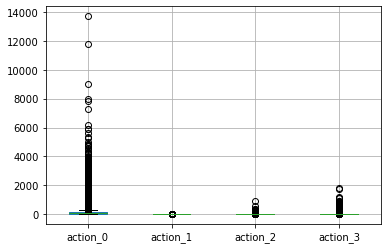

In [34]:
user_action.boxplot()

### brand info

In [16]:
brand_item_count = log[['brand_id','item_id']]
brand_item_count = brand_item_count.drop_duplicates()
brand_item_count['brand_item_count'] = 1
brand_item_count = brand_item_count.groupby(['brand_id']).agg('sum')
brand_item_count.drop('item_id', axis=1, inplace=True)
brand_item_count.index = brand_item_count.index.astype('int64')
brand_item_count.head()

,brand_item_count
brand_id,
1,118
2,2
3,2
4,1
5,153


In [19]:
brand_cat_count = log[['brand_id','cat_id']]
brand_cat_count = brand_cat_count.drop_duplicates()
brand_cat_count['brand_cat_count'] = 1
brand_cat_count = brand_cat_count.groupby(['brand_id']).agg('sum')
brand_cat_count.drop('cat_id', axis=1, inplace=True)
brand_cat_count.index = brand_cat_count.index.astype('int64')
brand_cat_count.head()

,brand_cat_count
brand_id,
1,17
2,1
3,1
4,1
5,11
